In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from latexify import *
%matplotlib inline
import matplotlib.patches as mpatches

In [2]:
x = np.array([0, 0.1, 0.2, 0.3, 0.6, 0.7, 0.9])

In [3]:
y = (x>0.4).astype('int')

In [4]:
y

array([0, 0, 0, 0, 1, 1, 1])

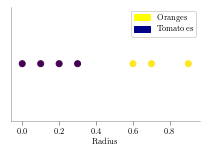

In [5]:

latexify()
plt.scatter(x, np.zeros_like(x), c=y)
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
plt.legend(handles=[yellow_patch, blue_patch])

plt.xlabel('Radius')
plt.gca().yaxis.set_visible(False) 
format_axes(plt.gca())
plt.savefig("logistic-orange-tomatoes-original.pdf", bbox_inches="tight", transparent=True)

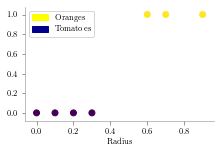

In [6]:
plt.scatter(x, y, c=y)
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
plt.legend(handles=[yellow_patch, blue_patch])

plt.xlabel('Radius')
format_axes(plt.gca())
plt.savefig("logistic-orange-tomatoes.pdf", bbox_inches="tight", transparent=True)

### Fitting linear model

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
linr_reg = LinearRegression()

In [9]:
linr_reg.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

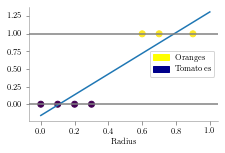

In [10]:
plt.plot(np.linspace(0, 1, 50), linr_reg.predict(np.linspace(0, 1, 50).reshape(-1, 1)))
plt.scatter(x, y, c=y)
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')

plt.xlabel('Radius')
format_axes(plt.gca())
plt.axhline(y=1, color='grey', label='P(y=1)')
plt.axhline(y=0, color='grey')
plt.legend(handles=[yellow_patch, blue_patch])

plt.savefig("linear-orange-tomatoes.pdf", bbox_inches="tight", transparent=True)

In [11]:
 (0.5-linr_reg.intercept_)/linr_reg.coef_

array([0.44857143])

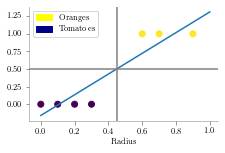

In [12]:
plt.plot(np.linspace(0, 1, 50), linr_reg.predict(np.linspace(0, 1, 50).reshape(-1, 1)))
plt.scatter(x, y, c=y)
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')

plt.xlabel('Radius')
format_axes(plt.gca())
#plt.axhline(y=1, color='grey', label='P(y=1)')
#plt.axhline(y=0, color='grey')
plt.axhline(y=0.5, color='grey')
plt.axvline(x=((0.5-linr_reg.intercept_)/linr_reg.coef_)[0], color='grey')

plt.legend(handles=[yellow_patch, blue_patch])

plt.savefig("linear-orange-tomatoes-decision.pdf", bbox_inches="tight", transparent=True)

In [13]:
x_dash = np.append(x, 2.5)
y_dash = np.append(y, 1)
linr_reg.fit(x_dash.reshape(-1, 1), y_dash)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

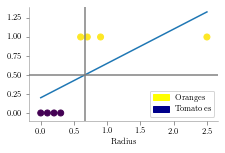

In [14]:
plt.plot(np.linspace(0, 2.5, 50), linr_reg.predict(np.linspace(0, 2.5, 50).reshape(-1, 1)))
plt.scatter(x_dash, y_dash, c=y_dash)
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')

plt.xlabel('Radius')
format_axes(plt.gca())
#plt.axhline(y=1, color='grey', label='P(y=1)')
#plt.axhline(y=0, color='grey')
plt.axhline(y=0.5, color='grey')
plt.axvline(x=((0.5-linr_reg.intercept_)/linr_reg.coef_)[0], color='grey')

plt.legend(handles=[yellow_patch, blue_patch])

plt.savefig("linear-orange-tomatoes-decision-modified.pdf", bbox_inches="tight", transparent=True)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(penalty='none', solver='lbfgs')

In [17]:
clf.fit(x.reshape(-1,1), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
clf.coef_

array([[55.99493009]])

In [19]:
-clf.intercept_[0]/clf.coef_[0]

array([0.4484548])

In [20]:
clf.intercept_

array([-25.11119514])

In [21]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

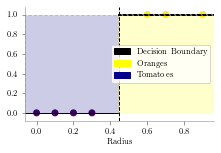

In [22]:
latexify()
plt.scatter(x, y, c=y)
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
black_patch = mpatches.Patch(color='black', label='Decision Boundary')
plt.axvline(x = -clf.intercept_[0]/clf.coef_[0],label='Decision Boundary',linestyle='--',color='k',lw=1)
plt.xlabel('Radius')
format_axes(plt.gca())
plt.legend(handles=[black_patch, yellow_patch, blue_patch])
plt.axhspan(0,1, xmin=0, xmax=0.49, linestyle='--',color='darkblue',lw=1, alpha=0.2)
plt.axhspan(0,0.001, xmin=0, xmax=0.49, linestyle='--',color='k',lw=1, )

plt.axhspan(0,1, xmax=1, xmin=0.49, linestyle='--',color='yellow',lw=1, alpha=0.2)
plt.axhspan(1,1.001,  xmax=1, xmin=0.49, linestyle='--',color='k',lw=1, )
plt.savefig("linear-orange-tomatoes-decision-ideal.pdf", bbox_inches="tight", transparent=True)

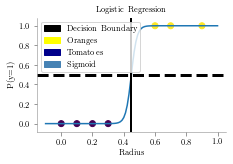

In [23]:
x_dum = np.linspace(-0.1, 1, 100)
plt.plot(x_dum, sigmoid(x_dum*clf.coef_[0] + clf.intercept_[0]))
plt.scatter(x, y, c=y)
latexify()
plt.axvline(-clf.intercept_[0]/clf.coef_[0], lw=2, color='black')
plt.axhline(0.5, linestyle='--',color='k',lw=3, label='P(y=1) = P(y=0)')
plt.ylabel("P(y=1)")
plt.xlabel('Radius')
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
black_patch = mpatches.Patch(color='black', label='Decision Boundary')
sigmoid_patch = mpatches.Patch(color='steelblue', label='Sigmoid')
plt.legend(handles=[black_patch, yellow_patch, blue_patch, sigmoid_patch])
format_axes(plt.gca())
plt.title("Logistic Regression")
plt.savefig("logistic.pdf", bbox_inches="tight", transparent=True)

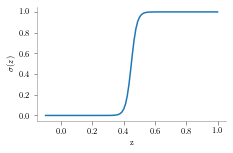

In [24]:
x_dum = np.linspace(-0.1, 1, 100)
plt.plot(x_dum, sigmoid(x_dum*clf.coef_[0] + clf.intercept_[0]))


format_axes(plt.gca())
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.savefig("logistic-function.pdf", bbox_inches="tight", transparent=True)